In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
batch_size = 32
num_classes = 10
epochs = 30

In [37]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Model 1

Model 1 is a very simple convolutional neural network

In [185]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))

model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [186]:
model1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [187]:
history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 7s 183us/step - loss: 2.0324 - acc: 0.2625 - val_loss: 1.7971 - val_acc: 0.3733
Epoch 2/30
40000/40000 [==============================] - 6s 153us/step - loss: 1.6949 - acc: 0.3938 - val_loss: 1.5630 - val_acc: 0.4431
Epoch 3/30
40000/40000 [==============================] - 7s 167us/step - loss: 1.5082 - acc: 0.4578 - val_loss: 1.4632 - val_acc: 0.4732
Epoch 4/30
40000/40000 [==============================] - 7s 169us/step - loss: 1.4036 - acc: 0.4986 - val_loss: 1.3917 - val_acc: 0.5023
Epoch 5/30
40000/40000 [==============================] - 7s 173us/step - loss: 1.3252 - acc: 0.5258 - val_loss: 1.3327 - val_acc: 0.5236
Epoch 6/30
40000/40000 [==============================] - 6s 155us/step - loss: 1.2561 - acc: 0.5557 - val_loss: 1.2577 - val_acc: 0.5594
Epoch 7/30
40000/40000 [==============================] - 6s 146us/step - loss: 1.1962 - acc: 0.5755 - val_loss: 1.2378 - 

In [200]:
result1 = model1.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_1 = result1[1]
print('The accuracy of model 1 for test data is: {}%'.format(test_acc_1*100))

10000/10000 [==============================] - 1s 74us/step
The accuracy of model 1 for test data is: 67.92%


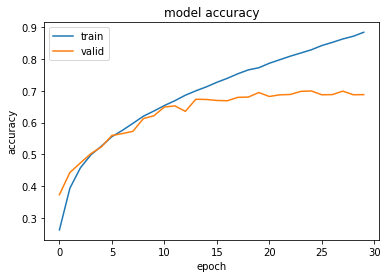

In [201]:
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

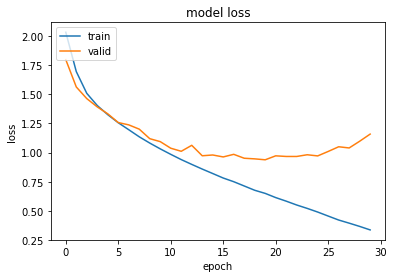

In [202]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Model 2

In [218]:
#add more layer and add droupout

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [219]:
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [220]:
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 10s 243us/step - loss: 2.3006 - acc: 0.1121 - val_loss: 2.2930 - val_acc: 0.1942
Epoch 2/100
40000/40000 [==============================] - 9s 216us/step - loss: 2.1990 - acc: 0.1774 - val_loss: 2.0539 - val_acc: 0.2381
Epoch 3/100
40000/40000 [==============================] - 9s 225us/step - loss: 2.0390 - acc: 0.2366 - val_loss: 1.9523 - val_acc: 0.2786
Epoch 4/100
40000/40000 [==============================] - 8s 196us/step - loss: 1.9196 - acc: 0.2803 - val_loss: 1.8000 - val_acc: 0.3250
Epoch 5/100
40000/40000 [==============================] - 8s 195us/step - loss: 1.8143 - acc: 0.3175 - val_loss: 1.7109 - val_acc: 0.3636
Epoch 6/100
40000/40000 [==============================] - 8s 206us/step - loss: 1.7370 - acc: 0.3506 - val_loss: 1.7834 - val_acc: 0.3456
Epoch 7/100
40000/40000 [==============================] - 7s 187us/step - loss: 1.6551 - acc: 0.3824 - val_loss: 1

In [221]:
result2 = model2.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_2 = result2[1]
print('The accuracy of model 2 for test data is: {}%'.format(test_acc_2*100))

10000/10000 [==============================] - 1s 87us/step
The accuracy of model 2 for test data is: 76.41%


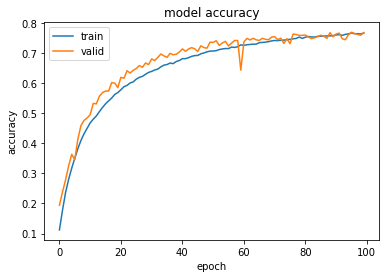

In [222]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

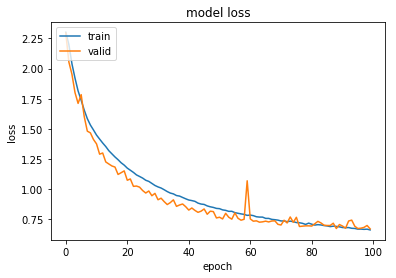

In [223]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Model 3

After I read some blogs on the website, I want to try the influence of different optimizer. Specifically, Adam will be used in this model

In [249]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

In [6]:
#define a new optimizer
from keras.optimizers import Adam
adam = Adam()

In [235]:
model3.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [236]:
history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 9s 219us/step - loss: 1.4760 - acc: 0.4626 - val_loss: 1.2023 - val_acc: 0.5709
Epoch 2/30
40000/40000 [==============================] - 7s 173us/step - loss: 1.0852 - acc: 0.6135 - val_loss: 1.0140 - val_acc: 0.6433
Epoch 3/30
40000/40000 [==============================] - 7s 176us/step - loss: 0.9095 - acc: 0.6760 - val_loss: 0.9848 - val_acc: 0.6611
Epoch 4/30
40000/40000 [==============================] - 7s 176us/step - loss: 0.7911 - acc: 0.7208 - val_loss: 0.9186 - val_acc: 0.6823
Epoch 5/30
40000/40000 [==============================] - 7s 174us/step - loss: 0.6881 - acc: 0.7572 - val_loss: 0.8336 - val_acc: 0.7164
Epoch 6/30
40000/40000 [==============================] - 7s 173us/step - loss: 0.6020 - acc: 0.7894 - val_loss: 0.8592 - val_acc: 0.7163
Epoch 7/30
40000/40000 [==============================] - 7s 177us/step - loss: 0.5225 - acc: 0.8150 - val_loss: 0.8455 - 

In [237]:
result3 = model3.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_3 = result3[1]
print('The accuracy of model 2 for test data is: {}%'.format(test_acc_2*100))

10000/10000 [==============================] - 1s 78us/step
The accuracy of model 2 for test data is: 76.41%


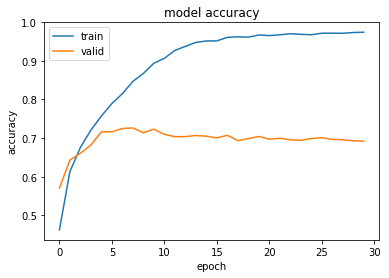

In [238]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

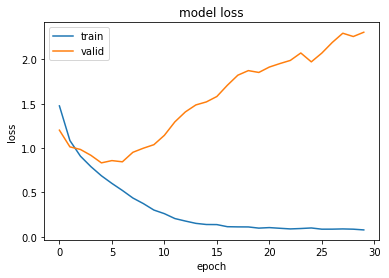

In [239]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Model 4

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20)

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [9]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Conv2D(32, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Conv2D(32, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))

model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [14]:
model4.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [15]:
# add augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [16]:
history4 = model4.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] / batch_size,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6575 - acc: 0.3918 - val_loss: 1.3521 - val_acc: 0.5127
Epoch 2/30
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3852 - acc: 0.4982 - val_loss: 1.1986 - val_acc: 0.5676
Epoch 3/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.2673 - acc: 0.5450 - val_loss: 1.2530 - val_acc: 0.5645
Epoch 4/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1946 - acc: 0.5709 - val_loss: 1.0541 - val_acc: 0.6252
Epoch 5/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1446 - acc: 0.5919 - val_loss: 0.9902 - val_acc: 0.6440
Epoch 6/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0990 - acc: 0.6068 - val_loss: 0.9290 - val_acc: 0.6691
Epoch 7/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0567 - acc: 0.6257 - val_loss: 0.9289 - val_acc: 0.6706
Epoch 8/30
1250/1250 [==========================

In [20]:
result4 = model4.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_4 = result4[1]
print('The accuracy of model 4 for test data is: {}%'.format(test_acc_4*100))

10000/10000 [==============================] - 1s 62us/step
The accuracy of model 4 for test data is: 74.58%


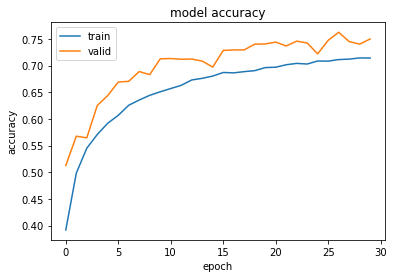

In [23]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

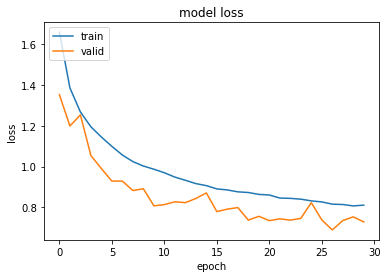

In [24]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Several key points can be concluded from the above 4 models:
  * Deeper is better, but needs more training time to show;
  * droup out is a solution for over-fitting
  * Adam optimizer is better than SGD
  * Data Augmentation has significant improvement for validate dataset

Based on these points, I build a new model

# Model 5

In [10]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.1))

model5.add(Conv2D(32, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.1))

model5.add(Conv2D(32, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.1))

model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))

model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.3))

model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

In [11]:
model5.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [12]:
# add augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [13]:
history5 = model5.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] / batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.8297 - acc: 0.3084 - val_loss: 1.4880 - val_acc: 0.4493
Epoch 2/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5400 - acc: 0.4332 - val_loss: 1.3067 - val_acc: 0.5181
Epoch 3/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4424 - acc: 0.4713 - val_loss: 1.3257 - val_acc: 0.5115
Epoch 4/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3809 - acc: 0.4969 - val_loss: 1.2265 - val_acc: 0.5525
Epoch 5/50
1250/1250 [==============================] - 14s 12ms/step - loss: 1.3324 - acc: 0.5211 - val_loss: 1.1842 - val_acc: 0.5760
Epoch 6/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3008 - acc: 0.5335 - val_loss: 1.1230 - val_acc: 0.5905
Epoch 7/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2712 - acc: 0.5460 - val_loss: 1.1012 - val_acc: 0.6007
Epoch 8/50
1250/1250 [==========================

In [16]:
result5 = model5.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_5 = result5[1]
print('The accuracy of model 5 for test data is: {}%'.format(test_acc_5*100))

10000/10000 [==============================] - 1s 63us/step
The accuracy of model 5 for test data is: 71.57%


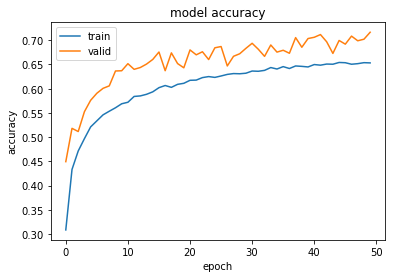

In [17]:
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

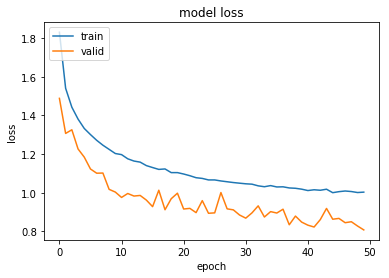

In [18]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()